# Tarea 3 Detección de anomalías y Clusters

In [1]:
#Tratamiento de datos
import numpy as np
import pandas as pd

#Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
#style.use('ggplot') or plt.style.use('ggplot')

import statsmodels.api as sm

import seaborn as sns

#Detección de anomalias
from sklearn.ensemble import IsolationForest

#Para construcción de dendrograma
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch

#Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Carga y descripción general de datos

In [2]:
#Carga del conjunto de datos
df= pd.read_csv('creditcardcsvpresent.csv')
df.head(5)

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [3]:
df.shape #Determinamos el tamaño del dataset

(3075, 12)

In [4]:
df.describe(include="all") #Descripción de valores 

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
count,3.075000e+03,0.0,3075.000000,3075.000000,3075,3075.000000,3075,3075,3075.000000,3075.000000,3075.000000,3075
unique,NaN,NaN,NaN,NaN,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,N,NaN,N,N,NaN,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,3018,NaN,2369,2870,NaN,NaN,NaN,2627
mean,5.026634e+09,NaN,515.026556,9876.399210,NaN,0.957398,NaN,NaN,55.737561,40.022407,0.391870,NaN
std,9.870778e+08,NaN,291.906978,10135.331016,NaN,2.192391,NaN,NaN,206.634779,155.968840,1.548479,NaN
min,3.160041e+09,NaN,4.011527,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,4.170814e+09,NaN,269.788047,2408.781147,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
50%,5.025578e+09,NaN,502.549575,6698.891856,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
75%,5.889625e+09,NaN,765.272803,14422.568935,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN


In [5]:
df.info() #Información del tipo de valores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [6]:
df.dtypes.value_counts() 

int64      4
float64    4
object     4
dtype: int64

In [7]:
df.columns

Index(['Merchant_id', 'Transaction date', 'Average Amount/transaction/day',
       'Transaction_amount', 'Is declined', 'Total Number of declines/day',
       'isForeignTransaction', 'isHighRiskCountry', 'Daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

Datos nulos

In [8]:
df_null=df.isnull().sum().sort_values(ascending=False)
df.dtypes.value_counts()
df_null

Transaction date                  3075
Merchant_id                          0
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64

# Separación de variables categoricas y numericas

Variables categoricas

In [9]:
VarCat=[]
for col in df.select_dtypes("object"):
    VarCat.append(col)
print(VarCat)

['Is declined', 'isForeignTransaction', 'isHighRiskCountry', 'isFradulent']


Variables numericas

In [10]:
VarNum=[]
for i in df.columns:
    if i not in VarCat:
        VarNum.append(i)
print(VarNum)

['Merchant_id', 'Transaction date', 'Average Amount/transaction/day', 'Transaction_amount', 'Total Number of declines/day', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt', '6-month_chbk_freq']


# Descripción de Datos Numéricos

Histograma de datos numéricos

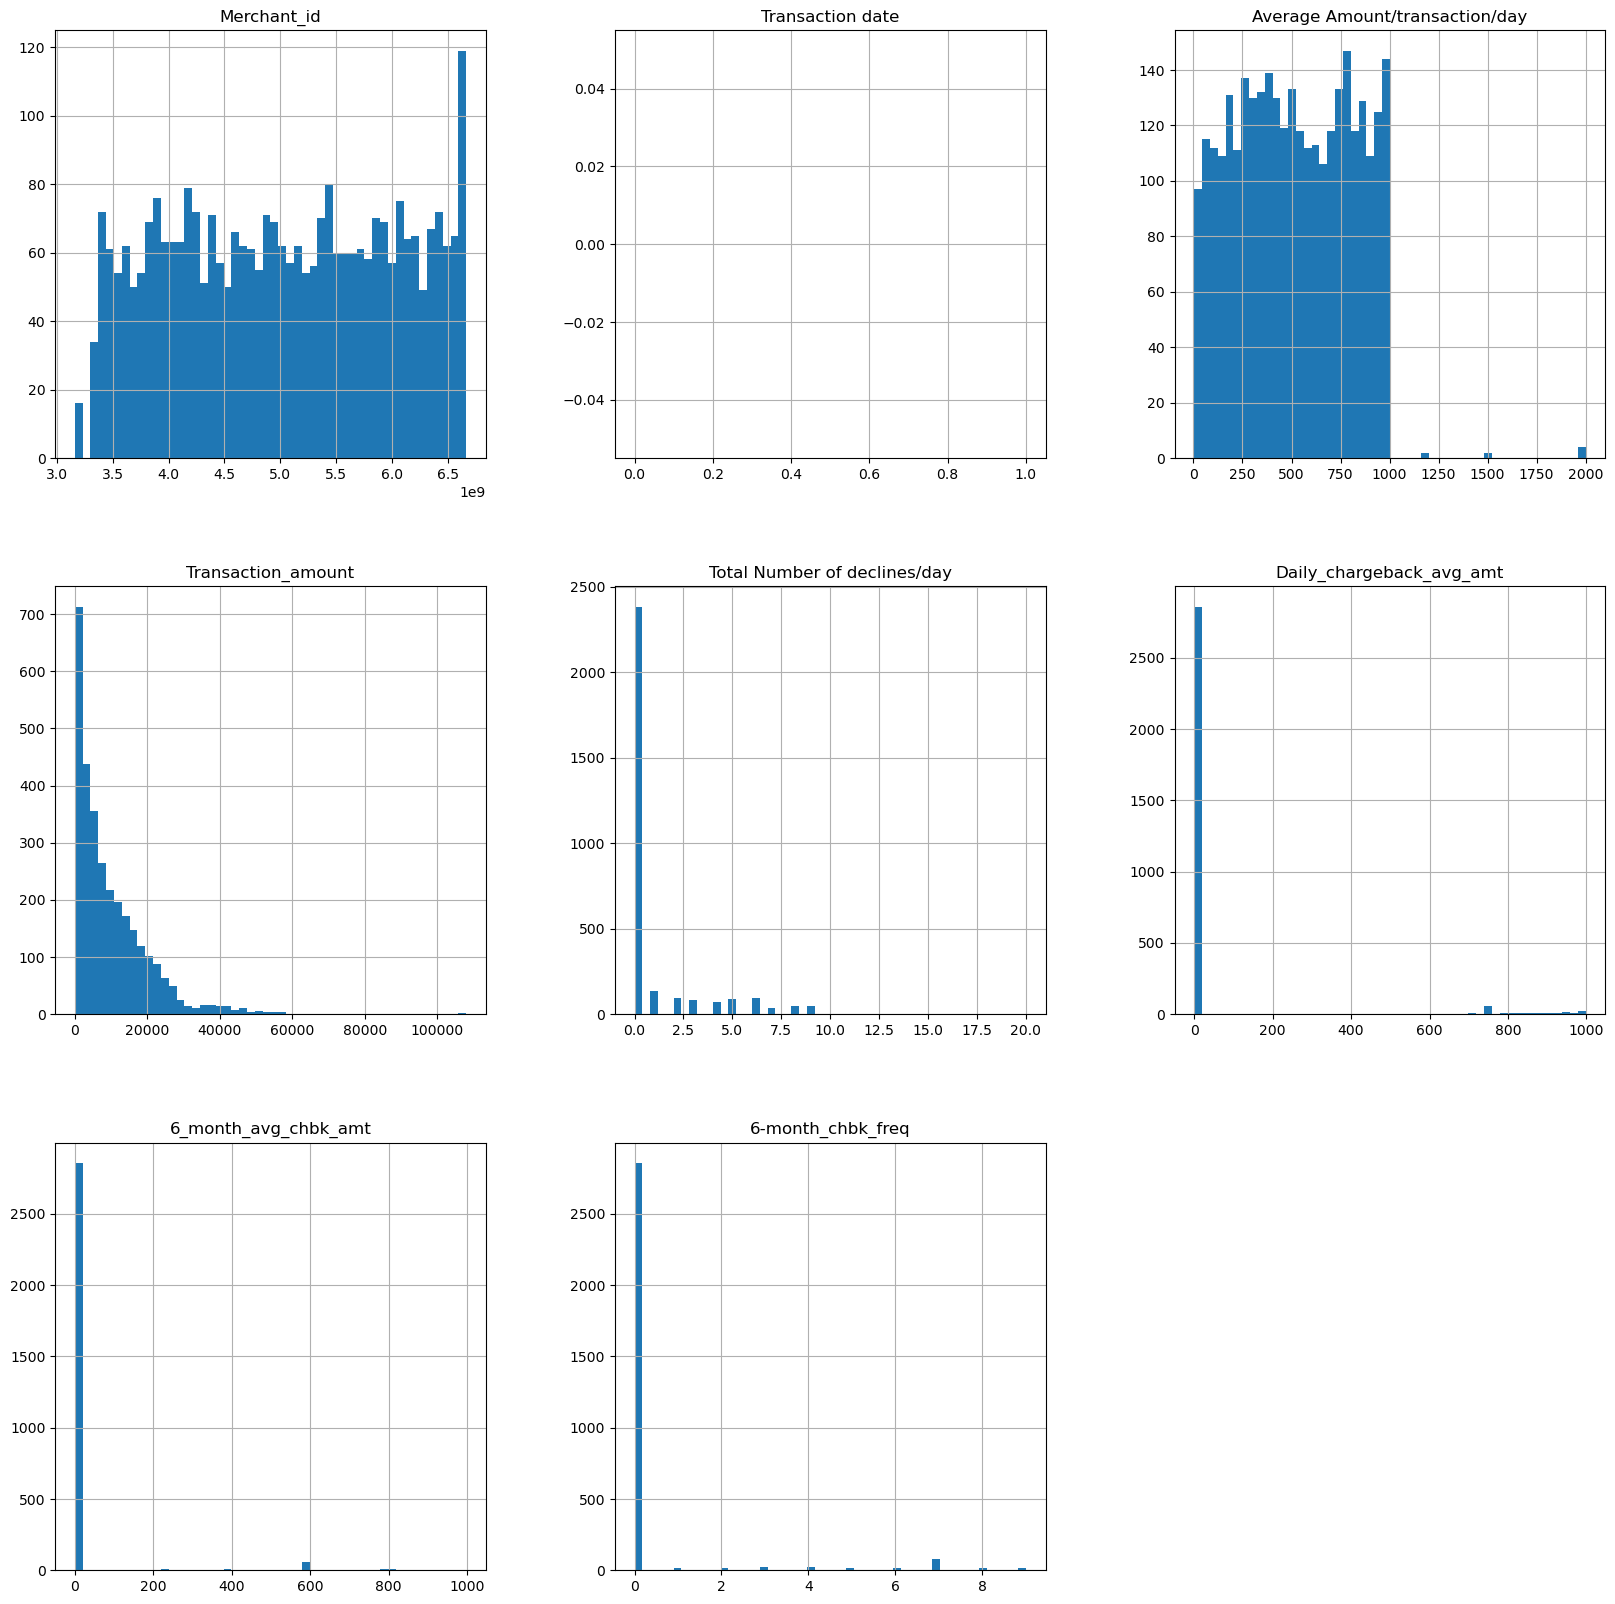

In [11]:
df[VarNum].hist(bins=50, figsize=(20,20))
plt.show()

Gráfico de caja para datos numéricos

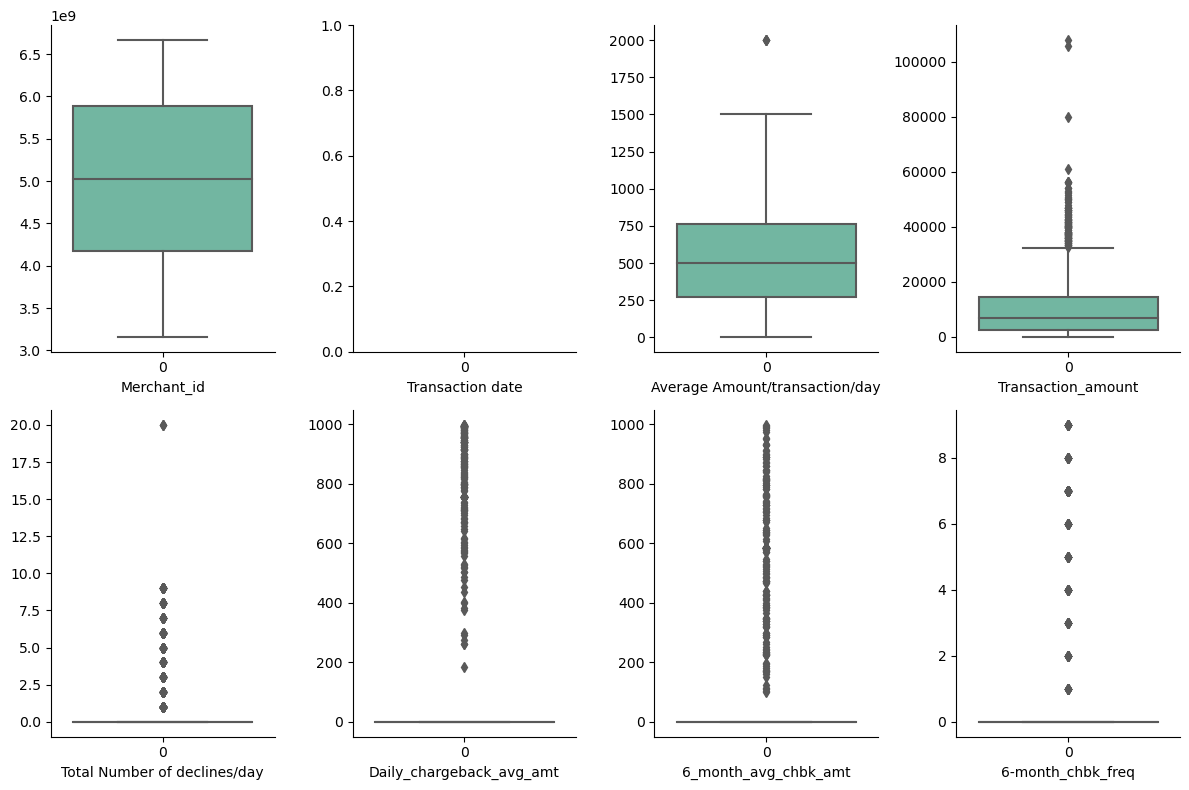

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

for i in range(0,len(VarNum)):
    x=i//4
    y=i%4
    sns.boxplot(data=df[VarNum[i]], palette="Set2", ax=axs[x,y])
    sns.despine(ax=axs[x,y])
    axs[x,y].set_xlabel(VarNum[i])
    
plt.tight_layout()
plt.show()


# Descripción de datos Categoricos

Histograma de variables categoricas

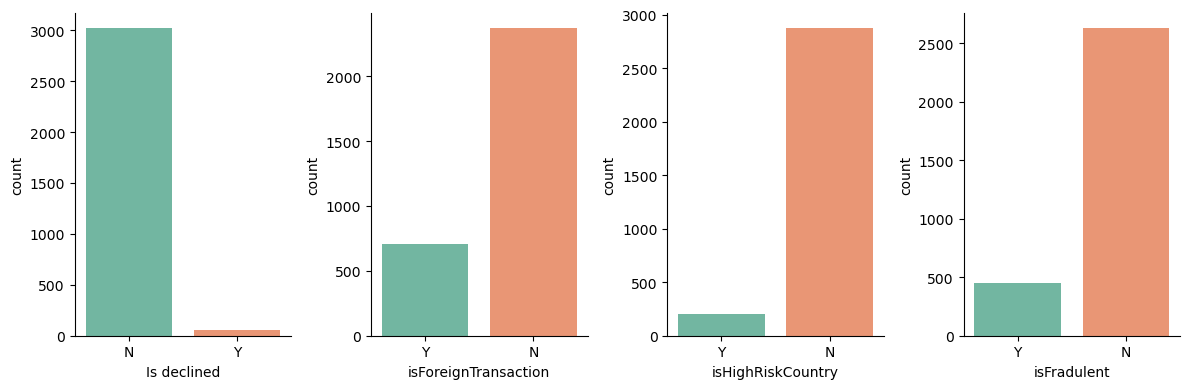

In [13]:
fig, axs = plt.subplots(ncols=4, figsize=(12, 4))

for i in range(0,len(VarCat)):
    sns.countplot(x=VarCat[i], data=df,palette='Set2', ax=axs[i])
    sns.despine(ax=axs[i])
    axs[i].set_xlabel(VarCat[i])
    
plt.tight_layout()
plt.show()

# Conversión de datos categoricos a numericos

Aplicamos LabelEncoder

In [14]:
df[VarCat] = df[VarCat].apply(LabelEncoder().fit_transform)

In [15]:
df.dtypes.value_counts() 

int64      8
float64    4
dtype: int64

In [16]:
#Eliminamos columna "Transaction date" ya que no aporta ninguna información util
df.drop(["Transaction date"],axis=1, inplace=True)

# Matris de correlación

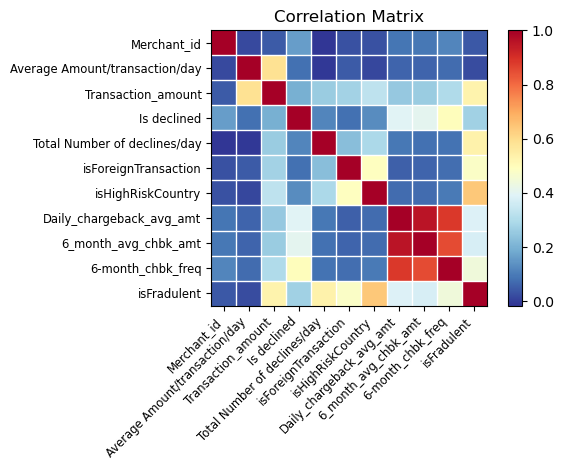

In [17]:
corr=df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

Matriz de correlación con valores de correlación 

Matriz de correlación


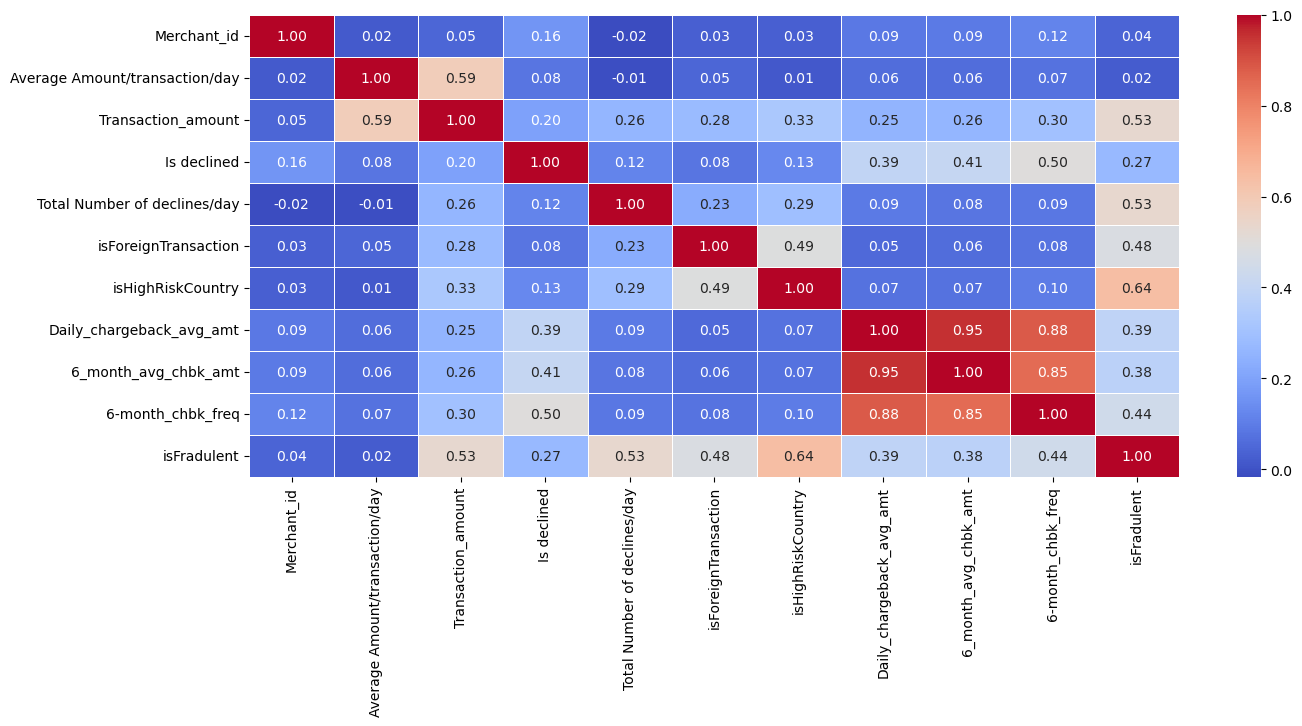

In [18]:
print('Matriz de correlación')
plt.rcParams['figure.figsize']=(15,6)
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,fmt='.2f',annot=True);

# Estandarización de datos

In [19]:
#Cramos una copia para detección de anomalias y otra para agrupación
df_1= df.copy()
df_2= df.copy()

# Detección de Anomalias

Quitamos el parametro isFraudulent para comparar datos

In [20]:
#Separamos datos guardando los valores anomalos reales en "Fraudes"
Fraudes=df_1["isFradulent"]
df_1.drop(["isFradulent"],axis=1, inplace=True)

Aplicamos la estandarización guardandolo en el nuevo dataframe dfStd

In [21]:
stdsc = StandardScaler()
dfstd = stdsc.fit_transform(df_1)
dfStd = pd.DataFrame(dfstd)

In [22]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# Descaled = mms.fit_transform(df)
# dfSc = pd.DataFrame(Descaled)

Graficamos para corroborar la estandarización

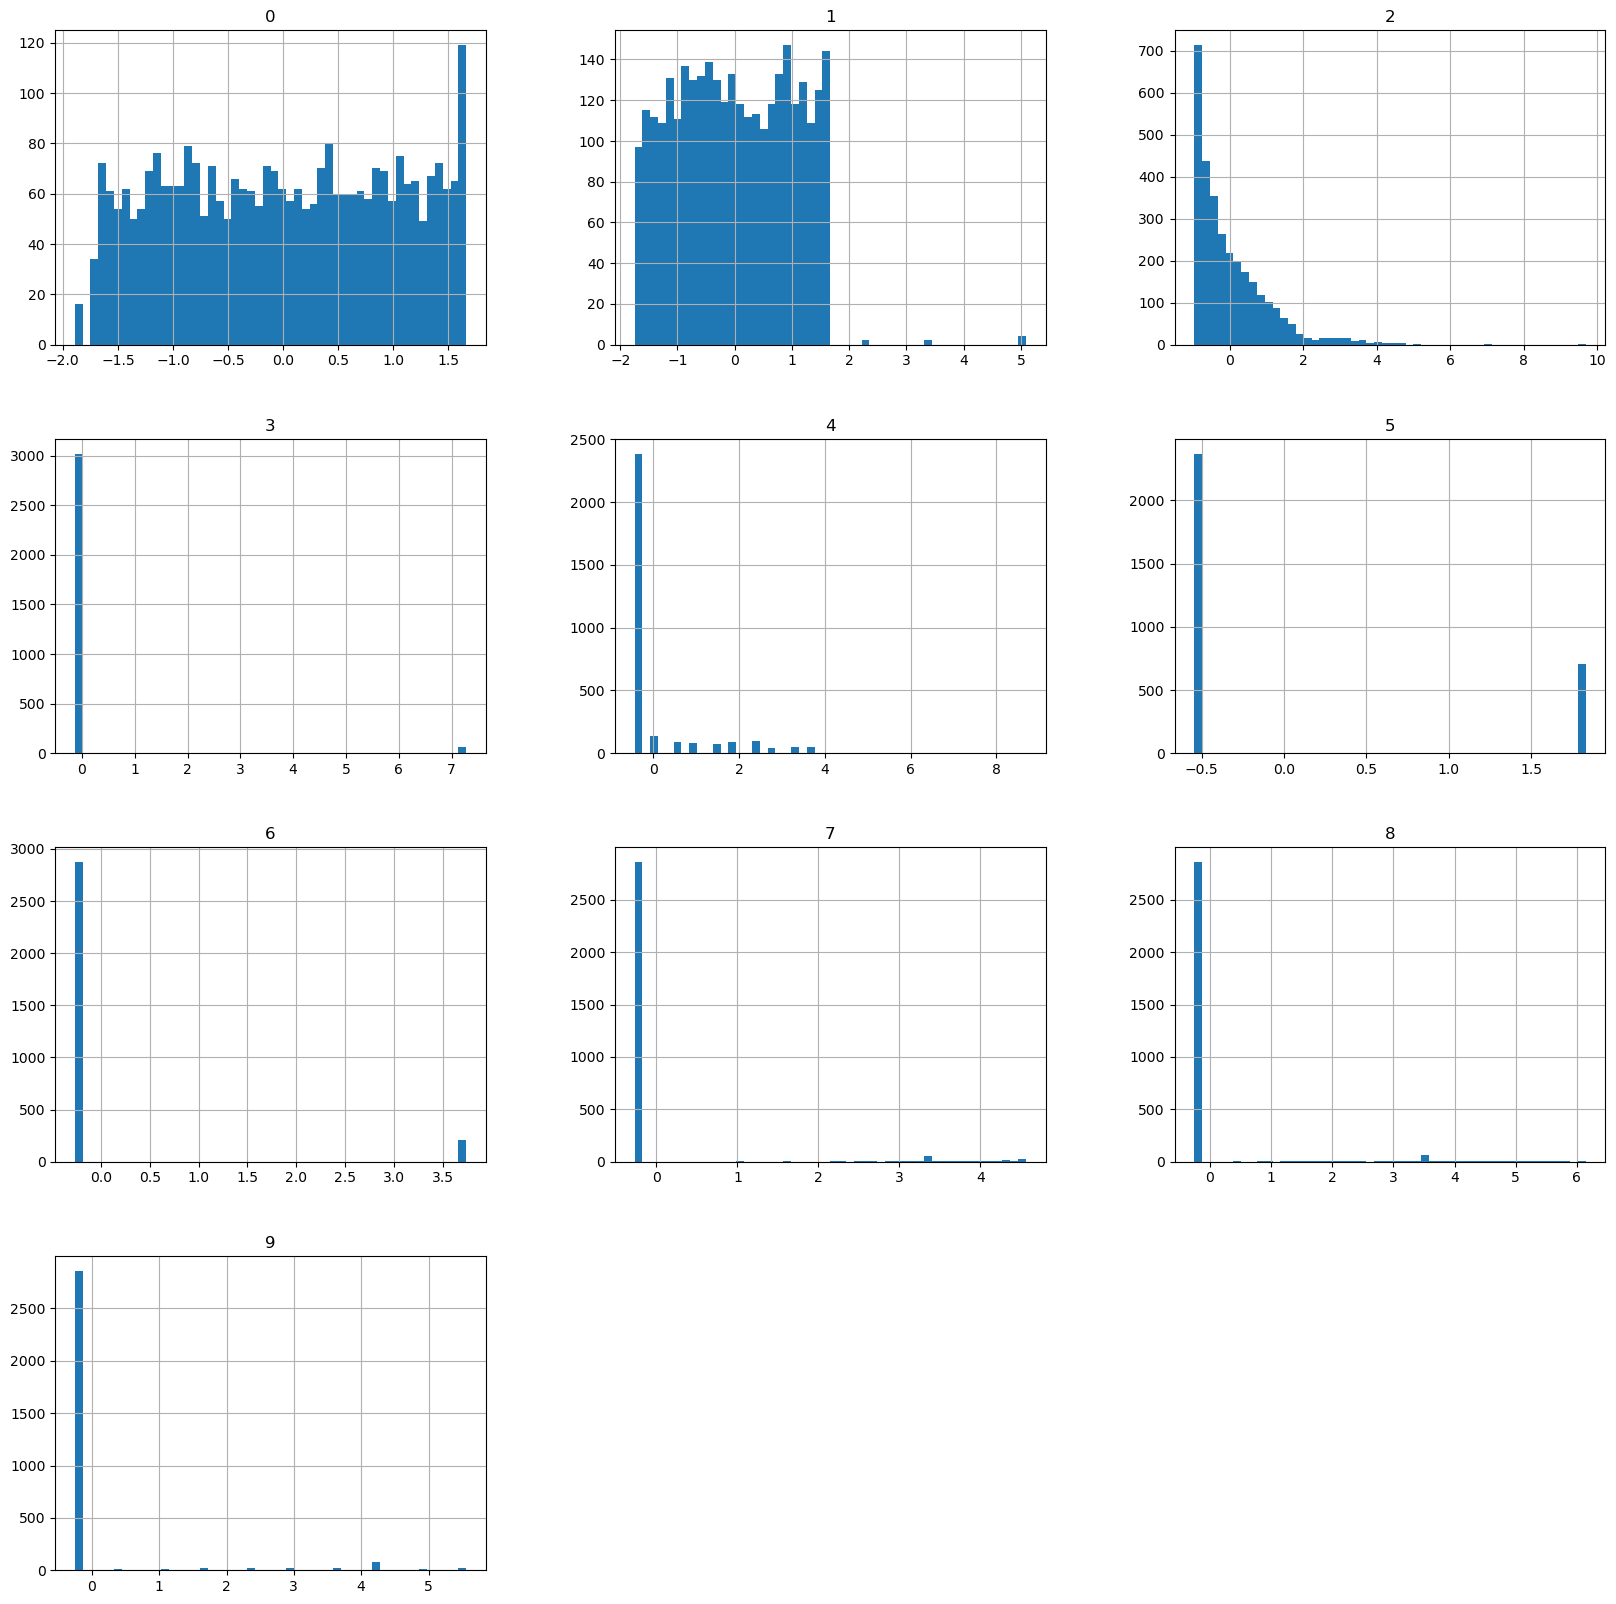

In [23]:
dfStd.hist(bins=50, figsize=(20,20))
plt.show()

# Isolation Forest

Creamos el modelo IsolationForest
Proponiendo 100 ramificaciones con una contaminación aproximada del 14% adecuandonos al valor de anomalias reales aproximadas

In [24]:
modelo_isof= IsolationForest(n_estimators=100, max_samples = 'auto', n_jobs= -1, contamination= float(0.14), max_features=1.0)
modelo_isof

IsolationForest(contamination=0.14, n_jobs=-1)

Entrenamos nuestro conjunto estandarizado

In [25]:
modelo_isof.fit(dfStd)

IsolationForest(contamination=0.14, n_jobs=-1)

Predecimos los valores anomalos 

In [26]:
clf_anomalia =modelo_isof.predict(dfStd)
clf_anomalia

array([-1, -1, -1, ..., -1, -1, -1])

Calculamos el score de proximidad de cada anomalía

In [27]:
score_anomalia = modelo_isof.score_samples(dfStd)
score_anomalia

array([-0.61605716, -0.61622706, -0.56945181, ..., -0.67722165,
       -0.71804112, -0.7266221 ])

Graficamos de acuerdo al score calculado

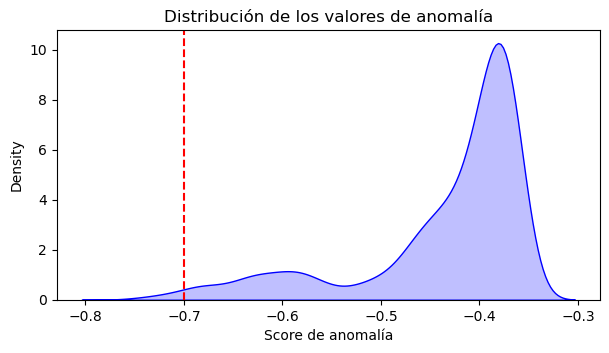

In [28]:
cuantil_01 = np.quantile(score_anomalia, q=0.01)

#Graficamos la distribución
fix, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,3.5))
sns.kdeplot(score_anomalia, color='blue',fill=True, linewidth=1, ax=ax)

ax.axvline(cuantil_01, c='red', linestyle='--', label='cuantil 0.01')
ax.set_title("Distribución de los valores de anomalía")
ax.set_xlabel('Score de anomalía')

plt.show()

Modificamos el valor de salida de 1 y -1 con el unico fin de que los valores representativos coincidan

In [29]:
#Agregamos los resultados a nuestro conjunto de datos original
df_1["Anomalia"]=clf_anomalia
df_1["Anomalia"]=df_1["Anomalia"].replace(1,0)
df_1["Anomalia"]=df_1["Anomalia"].replace(-1,1)

Creamos una grafica de comparación considerando las clases del conjunto original 'Transaction_amount' y 'Total Number of declines/day' coloreando cada una de ellas con el valor de anomalías encontrada contra el real que habiamos separado en un principio.

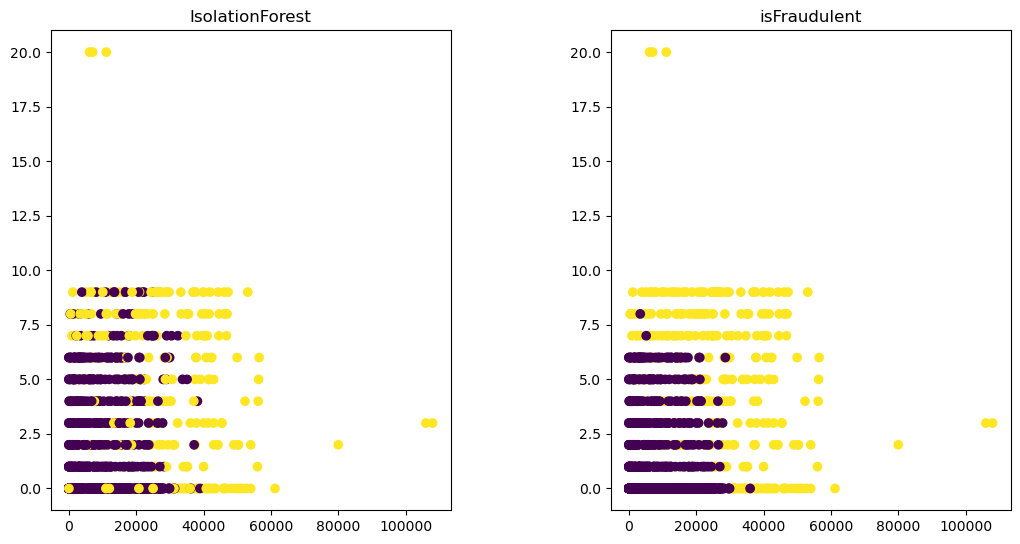

In [30]:
# Crear una figura con dos subplots uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafico de dispersión 1
ax1.scatter(df_1['Transaction_amount'], df_1['Total Number of declines/day'], c=df_1["Anomalia"])
ax1.set_title('IsolationForest')

# Grafico de dispersión 2
ax2.scatter(df_1['Transaction_amount'], df_1['Total Number of declines/day'], c=Fraudes)
ax2.set_title('isFraudulent')

# Ajustar los márgenes y espaciado entre subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4)

# Mostrar el gráfico
plt.show()

Creamos dos gráficas de pastel para comparar el porcentaje de valores anomalos obtenidos con respecto a los reales

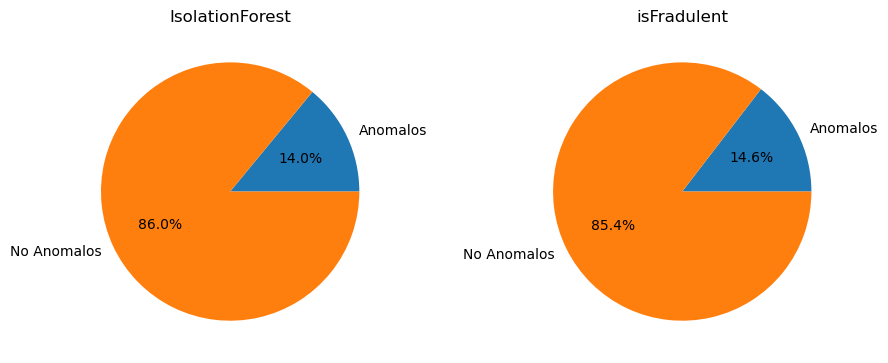

In [31]:
#Comparamos la cantidad de anomalias obtenidas con las que teniamos de referencia previamente
# Contar la cantidad de valores 1 y 0 calculados
num1_1 = (df_1['Anomalia'] == 1).sum()
num1_0 = (df_1['Anomalia'] == 0).sum()

# Contar la cantidad de valores 0 y 1 denominados como fraudolentos en el conjunto original
num2_1 = (Fraudes == 1).sum()
num2_0 = (Fraudes == 0).sum()

# Crear lista con los valores a graficar
valores1 = [num1_1, num1_0]
valores2 = [num2_1, num2_0]

# Crear lista con las etiquetas de los valores
etiquetas = ['Anomalos', 'No Anomalos']

# Crear las gráficas circulares en subplots
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Gráfica circular 1
axs[0].pie(valores1, labels=etiquetas, autopct='%1.1f%%')
axs[0].set_title('IsolationForest')

# Gráfica circular 2
axs[1].pie(valores2, labels=etiquetas, autopct='%1.1f%%')
axs[1].set_title('isFradulent')

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.4)

# Mostrar las gráficas
plt.show()

Creamos una gráfica por pares para poder corroborar los efectos de las anomalias producidas por el modelo de IsolationForest

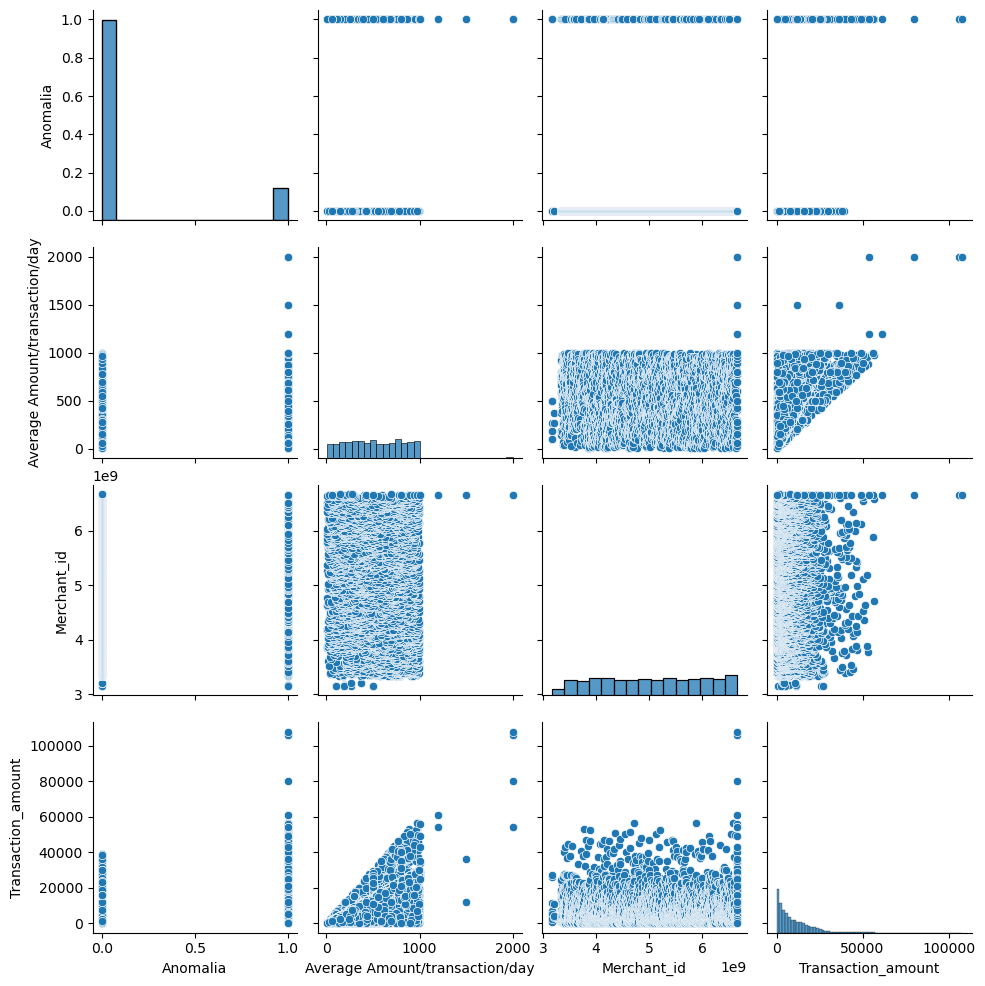

In [32]:
sns.pairplot(df_1[['Anomalia',"Average Amount/transaction/day","Merchant_id","Transaction_amount"]])

# Cluster o metodos no supervisados para agrupación de datos

Estandarizamos el conjunto de datos original

In [33]:
df_2std = StandardScaler().fit_transform(df_2)
df_2std = pd.DataFrame(df_2std)

In [34]:
x=df_2

Creamos el dendrograma para identificar cuantos clusters son preferibles en nuestro conjunto de datos

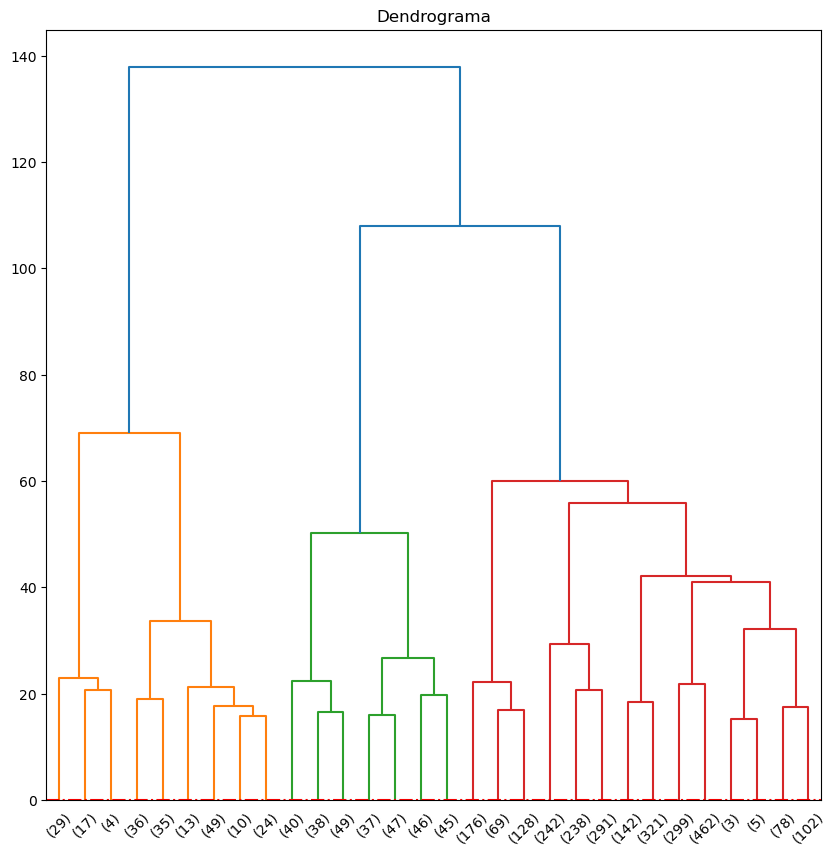

In [35]:
#Se analiza el vínculo entre los datos
cJerarquico = linkage(df_2std,'ward')

plt.figure(figsize=(10,10))
#Se obtiene el dendrograma al mismo tiempo que se plotea
dendrograma=sch.dendrogram(cJerarquico,truncate_mode='lastp')
plt.title("Dendrograma")
plt.axhline( color='red',linestyle='-.')
plt.show()

# Cluster por K-means

Seleccionamos 3 clusters usando con el algoritmo "elkhan" segun la pagina de referencia original.
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [36]:
km= KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=500, tol=0.0001,  random_state= None  , algorithm='elkan')

cluster= km.fit_predict(x)


Comprobamos la agrupación con los valores de datos originales y la predicción realizada, para observar como los valores se agrupan

Text(0.5, 1.0, 'Transaction_amounty Total Number of declines/day')

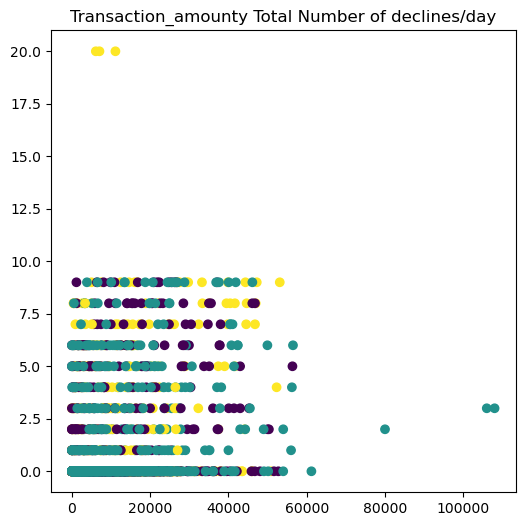

In [37]:
plt.figure(figsize=(6,6))
plt.scatter(x['Transaction_amount'],x['Total Number of declines/day'],c=km.labels_)
plt.title("Transaction_amounty Total Number of declines/day")

In [38]:
df_2["Cluster"]=cluster
df_2["Cluster"].value_counts() 

2    1055
0    1011
1    1009
Name: Cluster, dtype: int64

Una gráfica de pastel nos ayuda a discernir cuantas clases hay y que porcentaje agrupado existe en cada uno de ellos

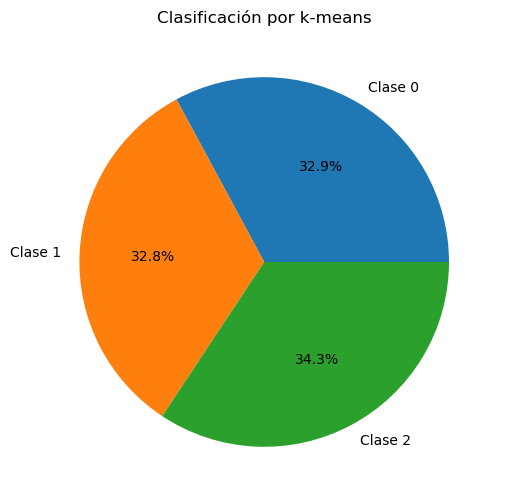

In [39]:
num_0 = (df_2["Cluster"] == 0).sum()
num_1 = (df_2["Cluster"] == 1).sum()
num_2 = (df_2["Cluster"] == 2).sum()
valores1 = [num_0,num_1,num_2]
etiquetas = ['Clase 0', 'Clase 1', "Clase 2"]
plt.pie(valores1, labels=etiquetas, autopct='%1.1f%%')
plt.title("Clasificación por k-means")
plt.show()

# Aglomerative Cluster

Una segunda alternativa fue aplical el Aglomerative Cluster, simplemente para poder evaluar la eficiencia de los dos clasificadores no supervisados.

In [40]:
agg = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
ClusterResultante = agg.fit_predict(x)
ClusterResultante

array([2, 2, 2, ..., 1, 1, 1])

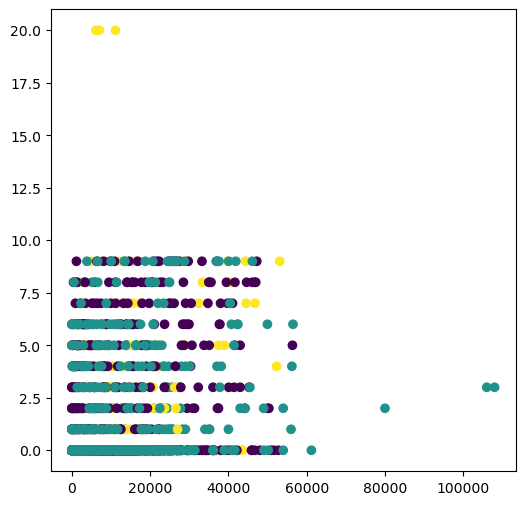

In [41]:
plt.figure(figsize=(6,6))
plt.scatter(x['Transaction_amount'],x['Total Number of declines/day'],c=agg.labels_)

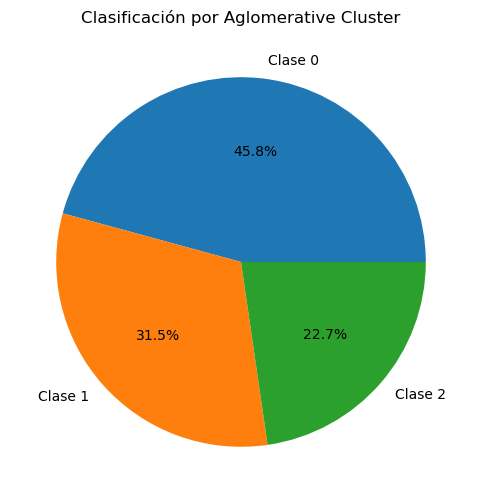

In [42]:
num_0 = (ClusterResultante == 0).sum()
num_1 = (ClusterResultante== 1).sum()
num_2 = (ClusterResultante == 2).sum()
valores1 = [num_0,num_1,num_2]
etiquetas = ['Clase 0', 'Clase 1', "Clase 2"]
plt.pie(valores1, labels=etiquetas, autopct='%1.1f%%')
plt.title("Clasificación por Aglomerative Cluster")
plt.show()